In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
data = pd.read_csv('vital.csv').drop(columns=['Unnamed: 0', 'caseid', 'casestart'])
data

,subjectid,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,...,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,ane_duration,surgery_duration
0,5955,11542,-552,10848.0,1668,10368,-236220,627780,0,0,...,0.0,100,70,0,10,0,0,0,11400.0,8700
1,2487,15741,-1039,14921.0,1721,14621,-221160,1506840,0,0,...,0.0,0,100,0,20,0,0,0,15960.0,12900
2,2861,4394,-590,4210.0,1090,3010,-218640,40560,0,0,...,0.0,0,50,0,0,0,0,0,4800.0,1920
3,1903,20990,-778,20222.0,2522,17822,-201120,576480,1,0,...,0.0,100,100,0,50,0,0,0,21000.0,15300
4,4416,21531,-1009,22391.0,2591,20291,-67560,3734040,13,0,...,0.0,0,160,0,10,900,0,2100,23400.0,17700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,5583,15248,-260,15640.0,2140,14140,-215340,648660,0,0,...,0.0,0,90,0,20,0,0,0,15900.0,12000
6383,2278,20643,-544,20996.0,2396,19496,-225600,1675200,0,0,...,0.0,0,100,0,25,30,0,300,21540.0,17100
6384,4045,19451,-667,19133.0,3533,18233,-200460,836340,0,0,...,0.0,0,130,0,10,0,0,0,19800.0,14700
6385,5230,12025,-550,12830.0,1730,11030,-227760,377040,0,0,...,0.0,0,50,0,0,0,0,0,13380.0,9300


In [45]:
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['department'] = le.fit_transform(data['department'])
data['optype'] = le.fit_transform(data['optype'])
data['dx'] = le.fit_transform(data['dx'])
data['opname'] = le.fit_transform(data['opname'])
data['approach'] = le.fit_transform(data['approach'])
data['position'] = le.fit_transform(data['position'])
data['ane_type'] = le.fit_transform(data['ane_type'])
data['preop_ecg'] = le.fit_transform(data['preop_ecg'])
data['preop_pft'] = le.fit_transform(data['preop_pft'])
data['cormack'] = le.fit_transform(data['cormack'])
data['airway'] = le.fit_transform(data['airway'])
data['dltubesize'] = le.fit_transform(data['dltubesize'])
data['iv1'] = le.fit_transform(data['iv1'])
data['iv2'] = le.fit_transform(data['iv2'])
data['aline1'] = le.fit_transform(data['aline1'])
data['aline2'] = le.fit_transform(data['aline2'])
data['cline1'] = le.fit_transform(data['cline1'])
data['cline2'] = le.fit_transform(data['cline2'])

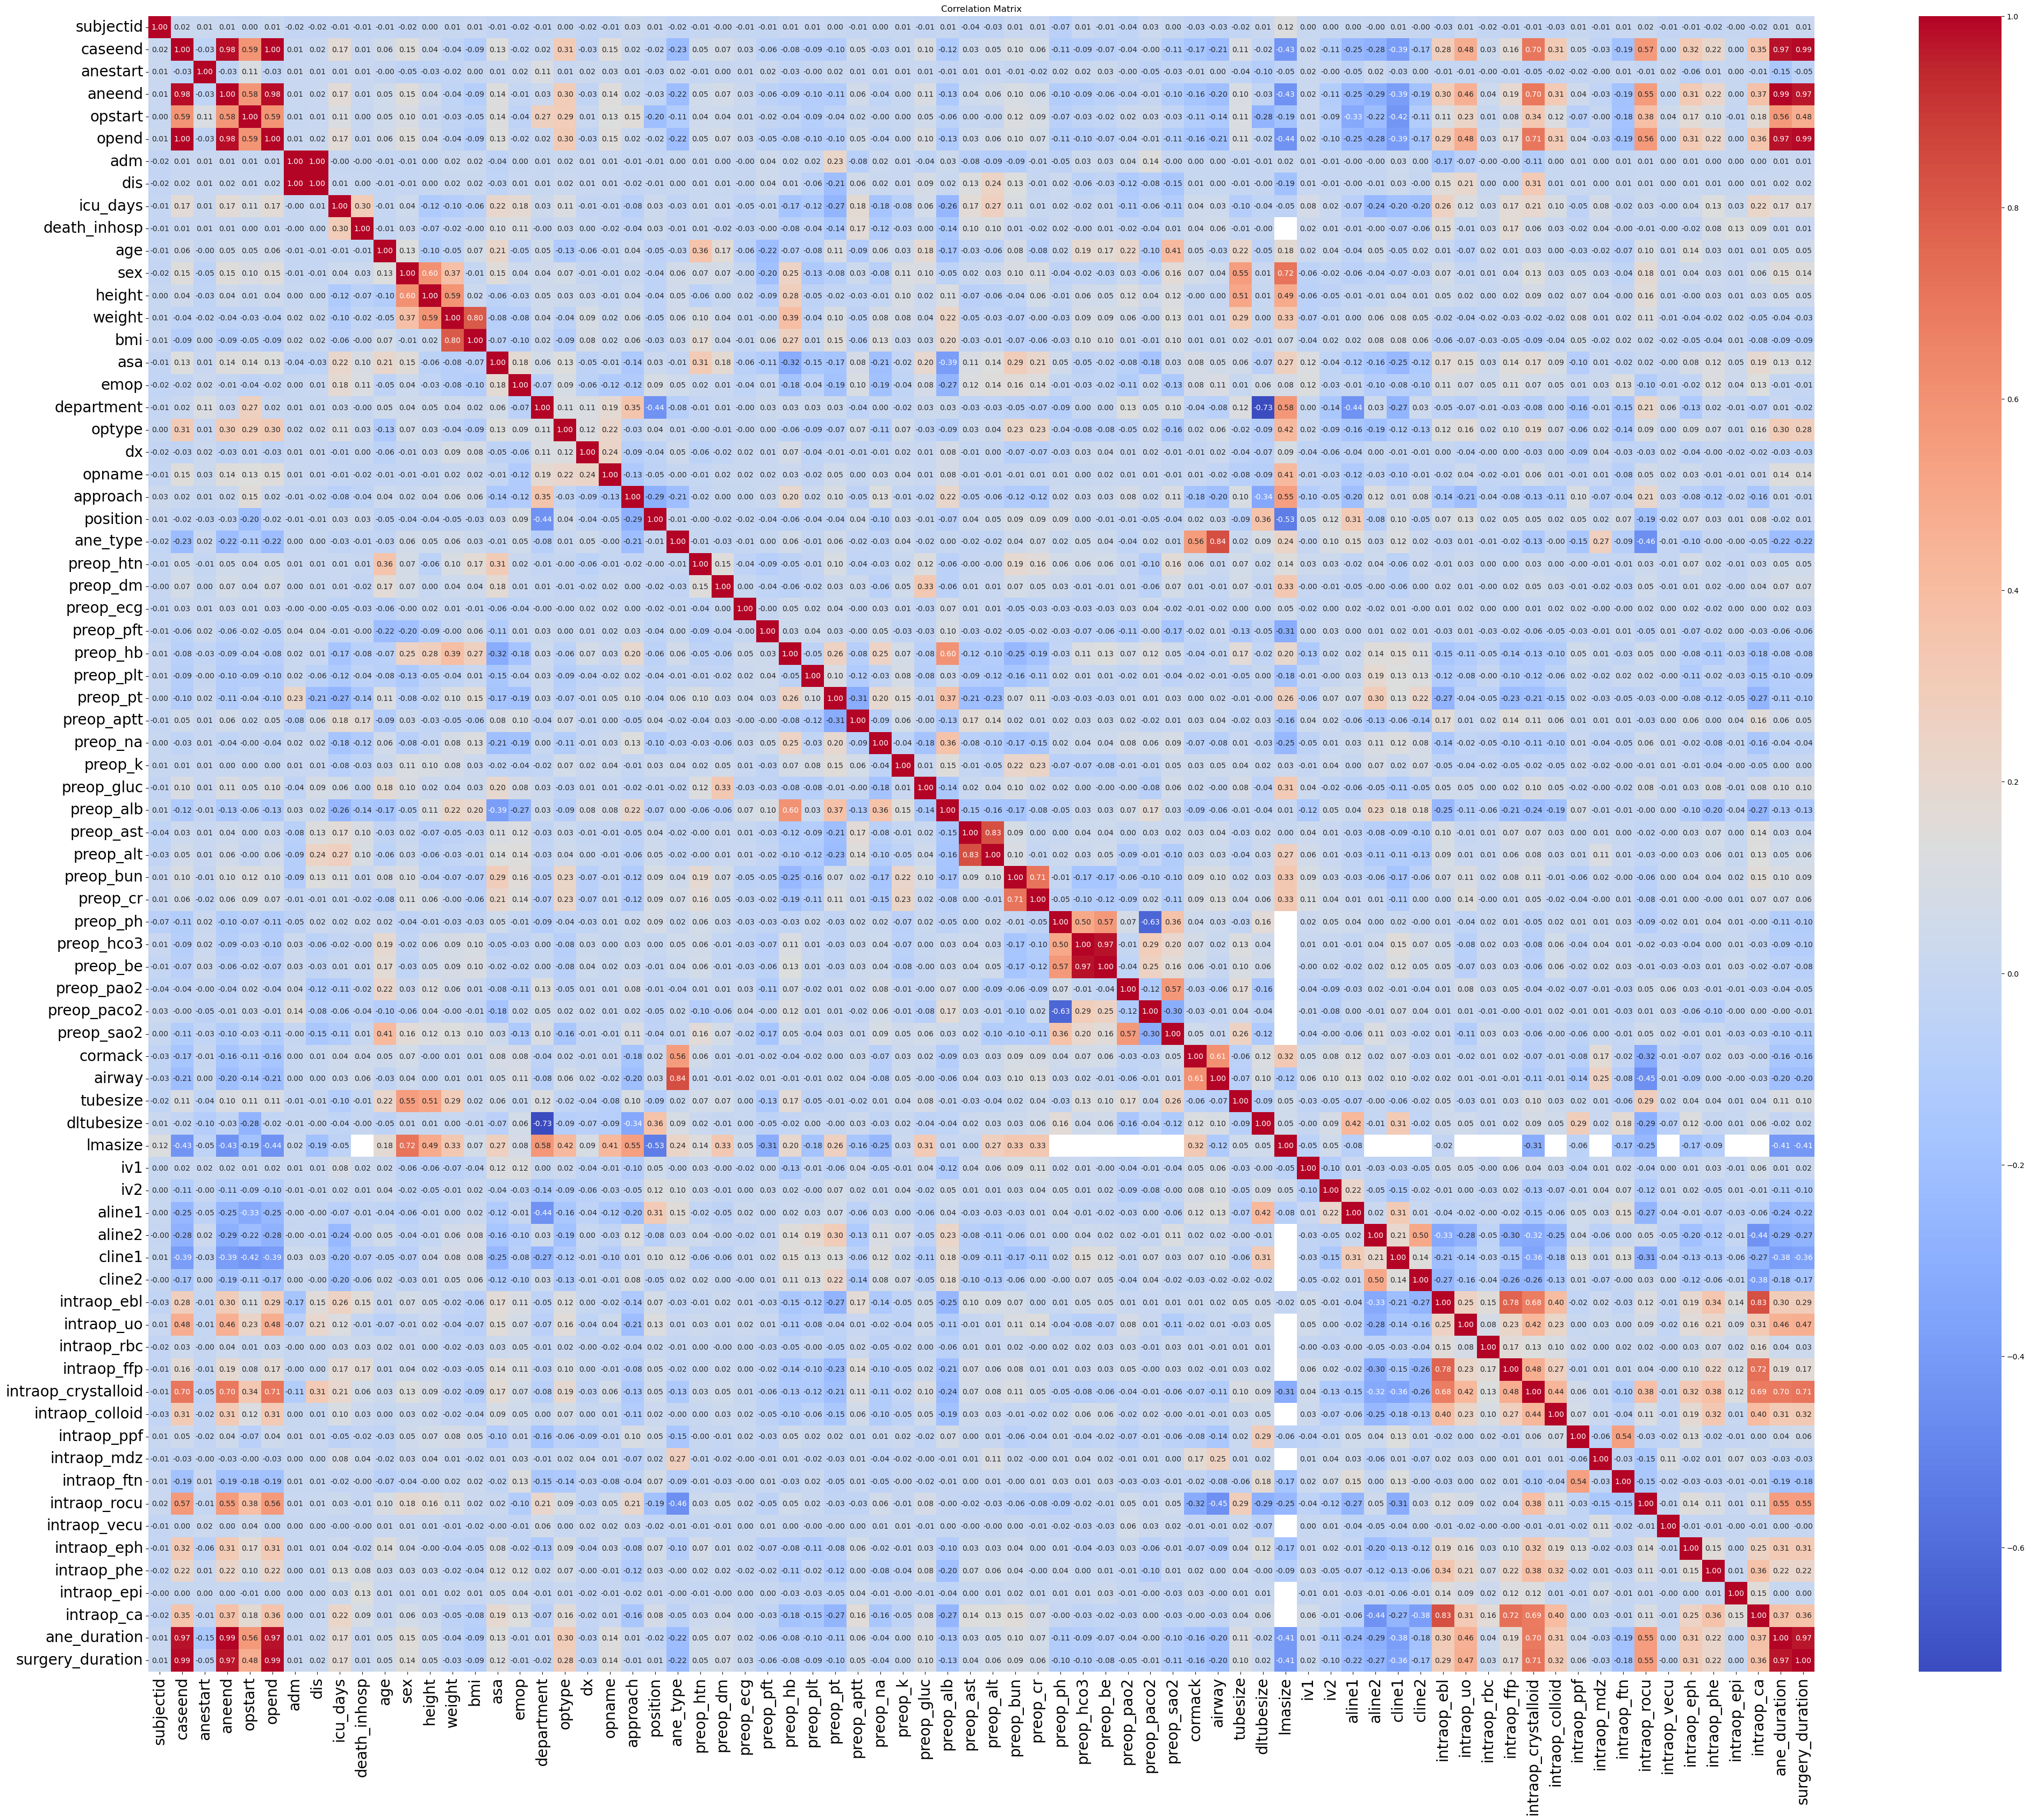

In [46]:
plt.figure(figsize=(50, 40))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

15.3885083713851


Text(0.5, 1.0, 'Correlation')

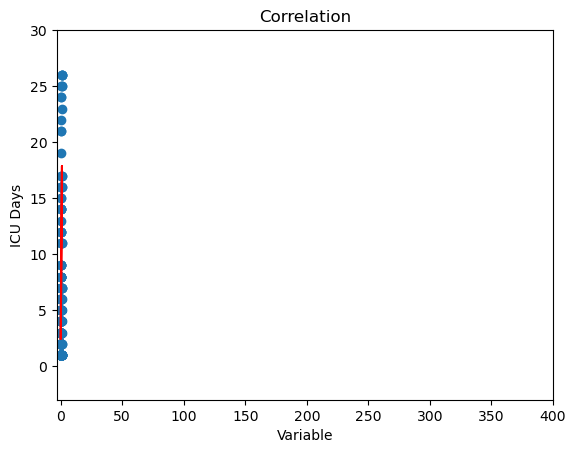

In [222]:
column1 = data[data['icu_days'] != 0]['death_inhosp'][:5000]
column2 = data[data['icu_days'] != 0]['icu_days'][:5000]

valid_indices = np.isfinite(column1) & np.isfinite(column2)
column1_clean = column1[valid_indices]
column2_clean = column2[valid_indices]

plt.scatter(column1, column2)
plt.xlabel('Variable')
plt.ylabel('ICU Days')

slope, intercept = np.polyfit(column1_clean, column2_clean, 1)
trendline = slope * column1_clean + intercept
plt.plot(column1_clean, trendline, color='red', label='Trendline')
print(slope)

plt.ylim(-3, 30)
plt.xlim(-3, 400)
plt.title('Correlation')

In [230]:
usedData = data[['preop_gluc', 'preop_alb', 'preop_alt', 'age', 'sex', 'height', 'weight', 'icu_days']].dropna(how='any')

X = usedData.drop(columns=['icu_days'])
y = usedData['icu_days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.00277923 -1.28636028  0.00733202 -0.02016378  1.02061555 -0.07003592
  0.00183292]
Intercept: 17.106211935352107


In [231]:
y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0

# Step 2: Evaluate accuracy using R² score
r2 = r2_score(y_test, y_pred)

# Step 3: Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Step 4: Print the evaluation metrics
print(f"R² Score: {r2}")
print(f"Error: {np.sqrt(mse)}")

R² Score: 0.18899554582483546
Error: 2.8896620042362744
